<a href="https://colab.research.google.com/github/vladimiralencar/DeepLearning-LANA/blob/master/ComputerVision/DeepLearning/MiniVGGNet_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LeNet - Rede Neural Convolucional - Classificação de Imagens - Cifar10

## Leitura de dados

In [1]:
!wget https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/ComputerVision/DeepLearning/convnet.py
!wget 

--2019-04-19 01:54:15--  https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/ComputerVision/DeepLearning/convnet.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6344 (6.2K) [text/plain]
Saving to: ‘convnet.py’

convnet.py          100%[===================>]   6.20K  --.-KB/s    in 0s      

2019-04-19 01:54:15 (146 MB/s) - ‘convnet.py’ saved [6344/6344]



In [86]:
!curl -L -o modelo_minivggnet.hdf5 https://github.com/vladimiralencar/DeepLearning-LANA/blob/master/ComputerVision/DeepLearning/modelo_minivggnet.hdf5?raw=true

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   180    0   180    0     0    869      0 --:--:-- --:--:-- --:--:--   865
100   191  100   191    0     0    571      0 --:--:-- --:--:-- --:--:--   571
100 16.6M  100 16.6M    0     0  22.5M      0 --:--:-- --:--:-- --:--:-- 22.5M


In [0]:
!rm  images.zip

In [40]:
!curl -L -o imagens.zip https://github.com/vladimiralencar/DeepLearning-LANA/raw/master/ComputerVision/DeepLearning/imagens.zip?raw=true
!unzip imagens.zip 
!rm imagens/.DS_Store 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   180  100   180    0     0    782      0 --:--:-- --:--:-- --:--:--   782
100  503k  100  503k    0     0  1389k      0 --:--:-- --:--:-- --:--:-- 1389k
Archive:  imagens.zip
replace imagens/image8.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: imagens/image8.jpg      
  inflating: imagens/image9.jpg      
  inflating: imagens/image10.jpg     
  inflating: imagens/image7.jpg      
  inflating: imagens/image6.jpg      
  inflating: imagens/image4.jpg      
  inflating: imagens/image5.jpg      
  inflating: imagens/image1.jpg      
  inflating: imagens/image2.jpg      
  inflating: imagens/image3.jpg      


In [74]:
!ls -ila 

total 35228
23199751 drwxr-xr-x 1 root root     4096 Apr 19 02:50 .
 5373954 drwxr-xr-x 1 root root     4096 Apr 19 01:53 ..
23199752 drwxr-xr-x 1 root root     4096 Apr  4 20:19 .config
 5637282 -rw-r--r-- 1 root root     6344 Apr 19 01:54 convnet.py
 5637305 drwxr-xr-x 2 root root     4096 Apr 19 02:55 imagens
 5637301 -rw-r--r-- 1 root root   515236 Apr 19 02:54 imagens.zip
 5637302 -rw-r--r-- 1 root root    59261 Apr 19 02:37 imagens.zip.1
 5637303 -rw-r--r-- 1 root root    59261 Apr 19 02:37 imagens.zip.2
 5637304 -rw-r--r-- 1 root root   515236 Apr 19 02:53 images.zip
 5637307 drwxrwxr-x 3 root root     4096 Apr 19 02:47 __MACOSX
 5637299 -rw-r--r-- 1 root root 17430184 Apr 19 02:24 modelo.hdf5
 5637300 -rw-r--r-- 1 root root 17430184 Apr 19 02:33 modeloVGGNet.hdf5
 5637285 drwxr-xr-x 2 root root     4096 Apr 19 01:54 __pycache__
 9306120 drwxr-xr-x 1 root root     4096 Apr  4 20:20 sample_data



Carregando o modelo (arquitetura e pesos)...

Testando o modelo em novas imagens
Classificando image2.jpg
Classificando image3.jpg
Classificando image9.jpg
Classificando image7.jpg
Classificando image4.jpg
Classificando image1.jpg
Classificando image6.jpg
Classificando image10.jpg
Classificando image5.jpg
Classificando image8.jpg


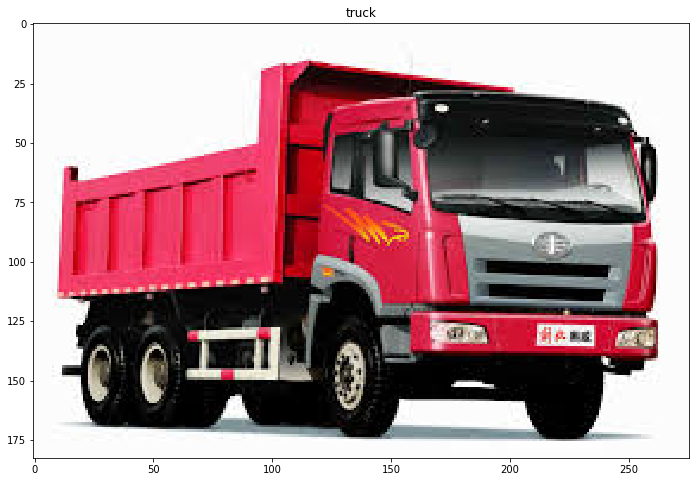

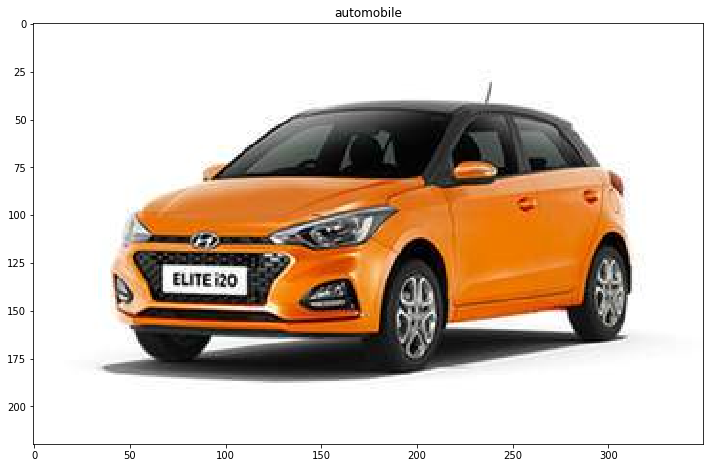

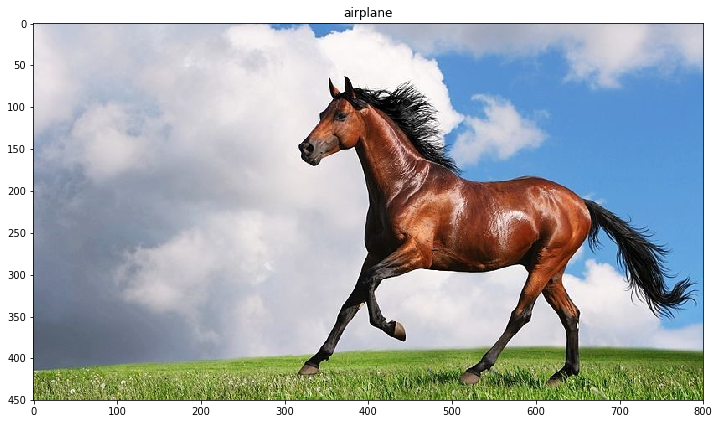

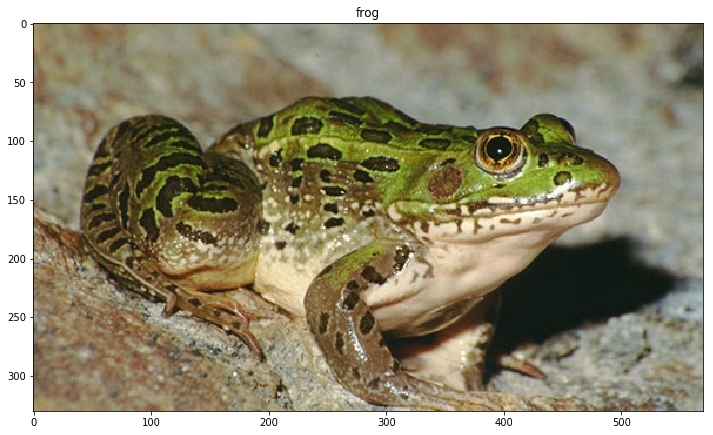

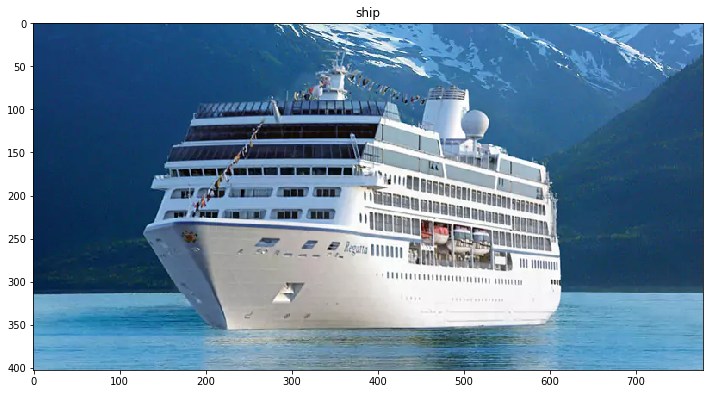

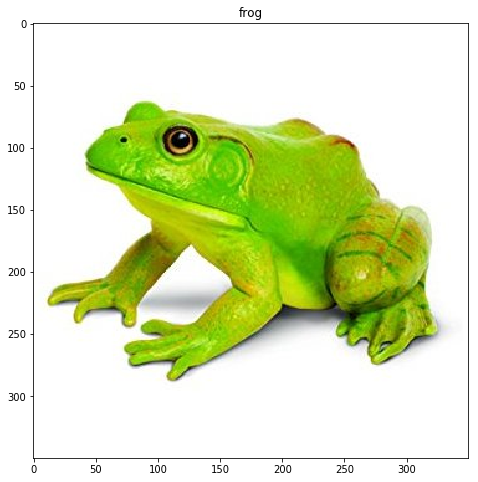

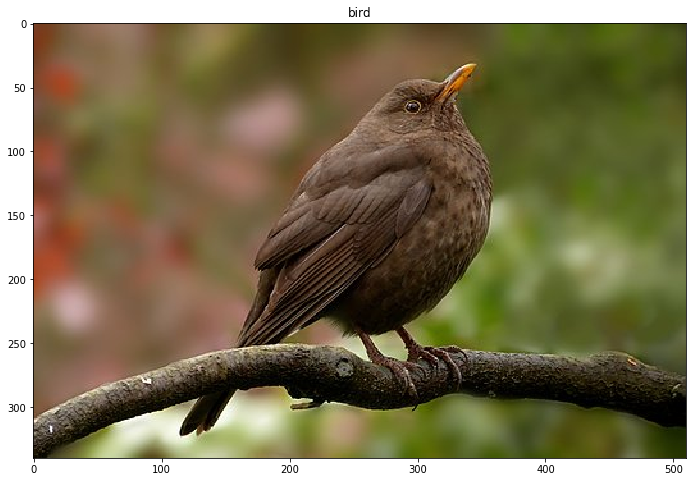

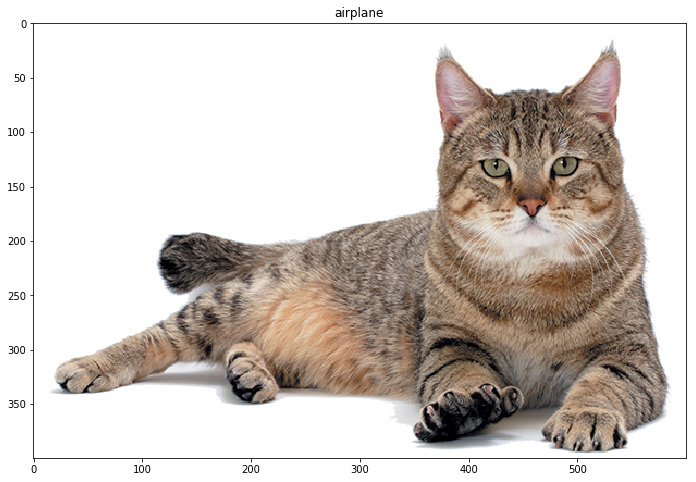

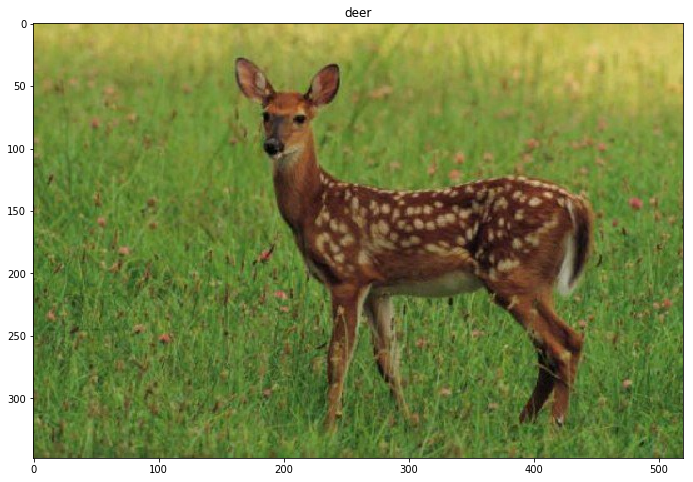

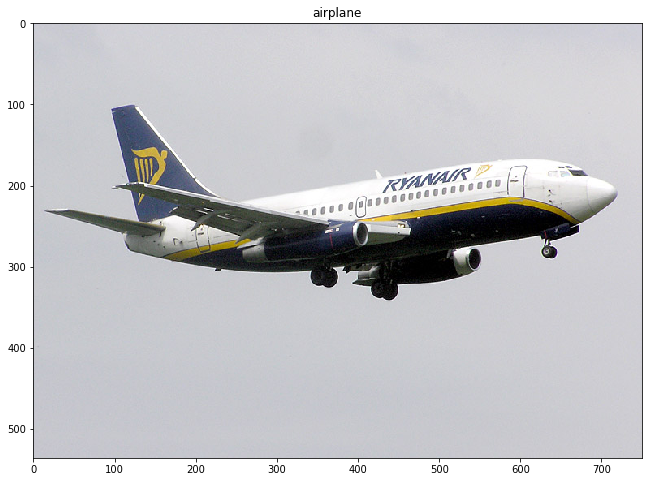

In [87]:
# Testando o Modelo Pré-Treinado

# Execute: python cap09-07-test-convnet.py --model modelo/modelo_minivggnet.hdf5 --test-images imagens

# Imports
import cv2
import imutils
import argparse
import numpy as np
from keras.models import load_model
from keras.datasets import cifar10
from imutils import paths
from matplotlib import pyplot as plt
%matplotlib inline

# Hiperparametros
modelo_path='modelo_minivggnet.hdf5'
test_images='imagens'
batch_size=32

# Lista com os labels no CIFAR-10 # 10 classes
gtLabels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Carregando o modelo
print("\nCarregando o modelo (arquitetura e pesos)...")
model = load_model(modelo_path)

# Testando o modelo em novas imagens
print("\nTestando o modelo em novas imagens")

# Loop pelas imagens de teste
for imagePath in paths.list_images(test_images):
    # Carrega a imagem, redimensiona para uma resolução fixa de 32 x 32 pixels (ignorando a proporção) e, em seguida, 
    # converte a imagem em ordem RGB para torná-la compatível com a nossa rede
    print("Classificando {}".format(imagePath[imagePath.rfind("/") + 1:]))
    image = cv2.imread(imagePath)
    kerasImage = cv2.resize(image, (32,32))
    kerasImage = cv2.cvtColor(kerasImage, cv2.COLOR_BGR2RGB)
    kerasImage = np.array(kerasImage, dtype="float") / 255.0

    # Adiciona uma dimensão extra à imagem para que possamos passá-la pela rede e, em seguida,
    # fazemos uma previsão na imagem (normalmente faríamos previsões em uma matriz * de imagens, uma a uma)
    kerasImage = kerasImage[np.newaxis, ...]
    probs = model.predict(kerasImage, batch_size=batch_size)
    prediction = probs.argmax(axis=1)[0]

    # Desenha a previsão na imagem de teste 
    #cv2.putText(image, gtLabels[prediction], (10, 35), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 3)
    #cv2.imshow("Imagem", image)
    #cv2.waitKey(0)
    
    # correct BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12,8))
    plt.title(gtLabels[prediction])
    plt.imshow(image)


## Faz download do arquivo de pesos do Modelo

In [0]:
from google.colab import files 
model_path='modeloVGGNet.hdf5'
files.download(model_path)